<a href="https://colab.research.google.com/github/alainegomes/trade_credit_risk/blob/main/Alaine_credit_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação e limpeza

In [122]:
##imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Utilizei o comando do pandas `read_csv` para importar os dados, utilizei o paramentro `sep` para definir o separador do arquivo como ';', pois o padrão da função é o separador como ','.

In [123]:
dados = pd.read_csv('/content/credit_risk_dataset.csv', sep= ';')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_status           1200 non-null   int64  
 1   credit_duration          1200 non-null   int64  
 2   history_of_compliance    1200 non-null   int64  
 3   credit_purpose           1200 non-null   int64  
 4   credit_amount            1200 non-null   int64  
 5   savings                  1200 non-null   int64  
 6   employment_duration      1200 non-null   int64  
 7   installment_rate         1200 non-null   int64  
 8   personal_status_sex      1200 non-null   int64  
 9   other_debtors            1200 non-null   int64  
 10  present_residence        1200 non-null   int64  
 11  property                 1200 non-null   int64  
 12  age                      1200 non-null   int64  
 13  other_installment_plans  1200 non-null   int64  
 14  type_of_housing         

In [124]:
dados.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
account_status,1200.0,2.52,1.23,1.0,1.00,2.00,4.00,4.00
credit_duration,1200.0,20.64,11.69,4.0,12.00,18.00,24.00,72.00
history_of_compliance,1200.0,2.48,1.06,0.0,2.00,2.00,4.00,4.00
credit_purpose,1200.0,2.73,2.65,0.0,1.00,2.00,3.00,10.00
credit_amount,1200.0,3239.49,2793.03,250.0,1359.50,2300.00,3959.00,18424.00
savings,1200.0,2.06,1.53,1.0,1.00,1.00,3.00,5.00
employment_duration,1200.0,3.31,1.19,1.0,2.00,3.00,4.00,5.00
installment_rate,1200.0,2.91,1.12,1.0,2.00,3.00,4.00,4.00
personal_status_sex,1200.0,2.65,0.69,1.0,2.00,3.00,3.00,4.00
other_debtors,1200.0,1.13,0.45,1.0,1.00,1.00,1.00,3.00


In [125]:
#Verificando valores nulos
dados.isnull().sum()


account_status               0
credit_duration              0
history_of_compliance        0
credit_purpose               0
credit_amount                0
savings                      0
employment_duration          0
installment_rate             0
personal_status_sex          0
other_debtors                0
present_residence            0
property                     0
age                          0
other_installment_plans      0
type_of_housing              0
number_credits               0
job                          0
people_liable                0
telephone                  758
foreign_worker               0
level_of_education           0
entry_payment                0
credit_risk                  0
dtype: int64

A coluna telefone tem 758 de 1200 dados nulos, o que equivale a mais de 60% de dados faltantes. Por esse motivo, decidi excluir essa coluna do dataframe

In [126]:
dados.drop('telephone', axis=1, inplace = True)

In [127]:
dados.shape

(1200, 22)

In [128]:
#transformando o tipo de dados de foreing_worker em int64. 
#substituindo yes = 1 e no = 0
dados['foreign_worker'].replace({'no': 0 , 'yes': 1}, inplace=True)

In [129]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_status           1200 non-null   int64  
 1   credit_duration          1200 non-null   int64  
 2   history_of_compliance    1200 non-null   int64  
 3   credit_purpose           1200 non-null   int64  
 4   credit_amount            1200 non-null   int64  
 5   savings                  1200 non-null   int64  
 6   employment_duration      1200 non-null   int64  
 7   installment_rate         1200 non-null   int64  
 8   personal_status_sex      1200 non-null   int64  
 9   other_debtors            1200 non-null   int64  
 10  present_residence        1200 non-null   int64  
 11  property                 1200 non-null   int64  
 12  age                      1200 non-null   int64  
 13  other_installment_plans  1200 non-null   int64  
 14  type_of_housing         

# Análise Exploratória

Para melhorar a visualização dos dados, decidi apresentar as descrições de cada atributo. Porém, para a etapa de predição com machine learning utilizarei os valores númericos. Por isso, optei por clonar o dataframe, preservando o original
 

In [130]:
df = dados.copy()

In [131]:
df['account_status'].replace({1:'no checking account' , 
                              2:'account < 0 DM',
                              3:'0<= account < 200 DM ',
                              4:'account >= 200 DM / salary for at least 1 year' }, inplace=True)

In [132]:
df['history_of_compliance'].replace({0:'delay in paying off in the past' ,
                                    1:'critical account/other credits elsewhere' , 
                                    2:'no credits taken/all credits paid back duly',
                                    3:'existing credits paid back duly till now',
                                    4:'all credits at this bank paid back duly' }, inplace=True)

In [133]:
df['credit_purpose'].replace({0:'others' ,
                               1:'car (new)' ,
                               2:'car (used)',
                               3:'furniture/equipment',
                               4:'radio/television',
                               5:'domestic appliances',
                               6:'repairs',
                               7:'education',
                               8:'vacation',
                               9:'retraining',
                               10:'business'}, inplace=True)

In [134]:
df['savings'].replace({1:'unknown/no savings account',
                       2:'savings <  100 DM ',
                       3:'100 <= savings <  500 DM',
                       4:'500 <= savings < 1000 DM',
                       5:'savings >= 1000 DM '}, inplace=True)

In [135]:
df['employment_duration'].replace({1:'unemployed',
                       2:'< 1 yr',
                       3:'1 <= duration < 4 yrs',
                       4:'4 <= duration < 7 yrs',
                       5:'>= 7 yrs'}, inplace=True)

In [136]:
df['installment_rate'].replace({1: '>= 35',
                       2:'25 <= rate < 35',
                       3:'20 <= rate < 25',
                       4:'<20'}, inplace=True)

In [137]:
df['personal_status_sex'].replace({1: 'male (divorced/separated) ',
                       2:'female (non-single) or male (single)',
                       3:'male (married/widowed)',
                       4:'female (single)'}, inplace=True)

In [138]:
df['other_debtors'].replace({1: 'none',
                       2:'co-applicant',
                       3:'guarantor'}, inplace=True)

In [139]:
df['present_residence'].replace({1: '< 1yr',
                       2:'1 <= reside < 4 yrs',
                       3:'4 <= reside < 7',
                       4:'>= yrs'}, inplace=True)

In [140]:
df['property'].replace({1: 'unknown / no property',
                       2:'car or other',
                       3:'building soc. savings agr./life insurance',
                       4:'real estate'}, inplace=True)

In [141]:
df['other_installment_plans'].replace({1: 'bank',
                       2:'stores',
                       3:'none'}, inplace=True)

In [142]:
df['type_of_housing'].replace({1: 'for free',
                       2:'rent',
                       3:'own'}, inplace=True)

In [143]:
df['number_credits'].replace({1: '1',
                       2:'2-3',
                       3:'4-5',
                       4:'>=6'}, inplace=True)

In [144]:
df['job'].replace({1:'unemployed/unskilled - non-resident',
                   2:'unskilled - resident',
                   3:'skilled employee/official',
                   4:'manager/self-empl./highly qualif. employee'}, inplace=True)

In [145]:
df['people_liable'].replace({1:'3 or more' , 2:'0 to 2'}, inplace=True)

In [146]:
df['foreign_worker'].replace({0:'no' , 1:'yes'}, inplace=True)

In [147]:
df['credit_risk'].replace({0:'bad' , 1:'good'}, inplace=True)

In [148]:
df.head()

,account_status,credit_duration,history_of_compliance,credit_purpose,credit_amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,type_of_housing,number_credits,job,people_liable,foreign_worker,level_of_education,entry_payment,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,<20,female (non-single) or male (single),none,>= yrs,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,3,52.45,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= duration < 4 yrs,25 <= rate < 35,male (married/widowed),none,1 <= reside < 4 yrs,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,3,167.94,good
2,account < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,savings < 100 DM,4 <= duration < 7 yrs,25 <= rate < 35,female (non-single) or male (single),none,>= yrs,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,4,58.87,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= duration < 4 yrs,20 <= rate < 25,male (married/widowed),none,1 <= reside < 4 yrs,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,yes,2,148.54,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= duration < 4 yrs,<20,male (married/widowed),none,>= yrs,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,yes,4,151.97,good


Agrupei os dados por `account_status` e `savings` para entender se há correlação entre eles e o `credit_risk`. Pode-se observar que pessoas que possuem uma reserva financeira e credito em conta são mais propensas a honrar com o pagamento de dívidas. Há mais pessoas com um risco ruim e que não possuem contas no banco e reservas financeiras, do que pessoas com um risco bom. (140 para o primeiro e 121 para o segundo)

In [149]:
pd.crosstab([df['account_status'], df['savings']],  df['credit_risk'], margins=True)

credit_risk                                                                bad  ...   All
account_status                                 savings                          ...      
0<= account < 200 DM                           100 <= savings <  500 DM      2  ...     8
                                               500 <= savings < 1000 DM      3  ...    13
                                               savings <  100 DM             1  ...     9
                                               savings >= 1000 DM            2  ...    12
                                               unknown/no savings account   13  ...    65
account < 0 DM                                 100 <= savings <  500 DM      4  ...    21
                                               500 <= savings < 1000 DM      6  ...    22
                                               savings <  100 DM            27  ...    57
                                               savings >= 1000 DM            7  ...    46
                                               unknown/no savings account   80  ...   189
account >= 200 DM / salary for at least 1 year 100 <= savings <  500 DM      6  ...    45
                                               500 <= savings < 1000 DM      2  ...    25
                                               savings <  100 DM             5  ...    47
                                               savings >= 1000 DM            9  ...   103
                                               unknown/no savings account   27  ...   206
no checking account                            100 <= savings <  500 DM      2  ...    11
                                               500 <= savings < 1000 DM      2  ...    10
                                               savings <  100 DM             8  ...    21
                                               savings >= 1000 DM           14  ...    29
                                               unknown/no savings account  140  ...   261
All                                                                        360  ...  1200

[21 rows x 3 columns]

Buscando avaliar como cada atributo do dataframe interfere no risco de crédito de cada pessoa, criei duas funções que retornam um outro dataframe com a porcentagem e os valores da média, desvio padrão e amplitude das porcentagens de maus pagadores para cada categoria do atributo escolhido.

Para isso, foi necessario criar duas funções, uma para os dados quantitativos `avalia_risco_quant` e outra para os dados categoricos `avalia_risco_cat`. 

A `avalia_risco_quant` categoriza os dados de acordo com os valores dos 4 quartis que foram obtidos com o a função `describe`.  
A função `avalia_risco_cat` faz uso do `pivot_table` para agrupa os dados de cada coluna, de acordo com a sua categoria, e somar a quantidade de dados presentes em cada uma. 

In [150]:
dados['idx']=1
dados['credit_risk_cat'] = dados['credit_risk'].replace({0:'bad', 1:'good'})
def avalia_risco_quant(df, col):
  dados_cut = pd.cut(df[col], bins=[x for x in df[col].describe()[3:]])
  avaliacao = df[['credit_risk', 'idx']].groupby(dados_cut).sum().reset_index()
  avaliacao['porcentagem_risco_ruim'] = round((1 - (avaliacao['credit_risk'] / avaliacao['idx']))*100,4)
  amplitude = round(avaliacao['porcentagem_risco_ruim'].max()- avaliacao['porcentagem_risco_ruim'].min(),4)
  media = round(avaliacao['porcentagem_risco_ruim'].mean(),4)
  desvio = round(avaliacao['porcentagem_risco_ruim'].std(),4)
  return avaliacao, amplitude, media, desvio

def avalia_risco_cat(df, col):
  avaliacao=df.pivot_table('idx',index=col, columns='credit_risk_cat',aggfunc=sum,margins=True).reset_index()
  avaliacao['porcentagem_risco_ruim'] = round((avaliacao['bad']/avaliacao['All'])*100,4)
  amplitude = round(avaliacao['porcentagem_risco_ruim'].max()- avaliacao['porcentagem_risco_ruim'].min(),4)
  media = round(avaliacao['porcentagem_risco_ruim'].mean(),4)
  desvio = round(avaliacao['porcentagem_risco_ruim'].std(),4)
  return (avaliacao[:-1]).sort_values( 'porcentagem_risco_ruim', ascending = False), amplitude,media, desvio




Utilizei um laço de repetição para visualizar os dataframes

In [151]:
for col in ['credit_duration', 'credit_amount', 'entry_payment', 'age' ]:
  print(col)
  retorno, amplitude,media, desvio = avalia_risco_quant(dados, col)
  print(retorno)
  print(f'media das porcentagens: {media}')
  print(f'desvio padrão das porcentagens: {desvio}')
  print(f'amplitude amostral das porcentagens: {amplitude}\n')

credit_duration
  credit_duration  credit_risk  idx  porcentagem_risco_ruim
0     (4.0, 12.0]          325  414                 21.4976
1    (12.0, 18.0]          164  234                 29.9145
2    (18.0, 24.0]          189  273                 30.7692
3    (24.0, 72.0]          156  273                 42.8571
media das porcentagens: 31.2596
desvio padrão das porcentagens: 8.7911
amplitude amostral das porcentagens: 21.3595

credit_amount
       credit_amount  credit_risk  idx  porcentagem_risco_ruim
0    (250.0, 1359.5]          205  299                 31.4381
1   (1359.5, 2300.0]          223  300                 25.6667
2   (2300.0, 3959.0]          235  301                 21.9269
3  (3959.0, 18424.0]          176  299                 41.1371
media das porcentagens: 30.0422
desvio padrão das porcentagens: 8.3676
amplitude amostral das porcentagens: 19.2102

entry_payment
        entry_payment  credit_risk  idx  porcentagem_risco_ruim
0      (12.5, 80.745]          211  299    

In [152]:
for col in ['account_status','history_of_compliance','credit_purpose','savings',\
            'employment_duration','installment_rate','personal_status_sex',\
            'other_debtors','present_residence','number_credits','type_of_housing',\
            'other_installment_plans', 'job', 'people_liable', 'level_of_education',\
            'foreign_worker']:
  print(col)
  retorno, amplitude, media, desvio = avalia_risco_cat(dados, col)
  print(retorno)
  print(f'media das porcentagens: {media}')
  print(f'desvio padrão das porcentagens: {desvio}')
  print(f'amplitude amostral das porcentagens: {amplitude}\n')

account_status
credit_risk_cat account_status  bad  good  All  porcentagem_risco_ruim
0                            1  166   166  332                 50.0000
1                            2  124   211  335                 37.0149
2                            3   21    86  107                 19.6262
3                            4   49   377  426                 11.5023
media das porcentagens: 29.6287
desvio padrão das porcentagens: 14.9858
amplitude amostral das porcentagens: 38.4977

history_of_compliance
credit_risk_cat history_of_compliance  bad  good  All  porcentagem_risco_ruim
0                                   0   31    16   47                 65.9574
1                                   1   37    35   72                 51.3889
2                                   2  205   441  646                 31.7337
3                                   3   37    88  125                 29.6000
4                                   4   50   260  310                 16.1290
media das porcentagens

Decidi criar um segundo dataframe (`dados_tratados`), que será a cópia do primeiro (`dados`) e excluir as colunas que possuem uma amplitude e desvio padrão de porcentagens baixos. Pois esses dados influenciam menos o modelo, excluir eles faz com que o modelo fique mais leve e otimizado. 
Eu rodei os modelos com o dataframe completo e os valores de acurácia foram próximos dos valores com o dataframe `dados_tratados`

In [153]:
dados_tratados = dados.copy()
dados_tratados.drop(['level_of_education', 'people_liable', 'job',\
                    'number_credits','present_residence','installment_rate','entry_payment','idx', 'credit_risk_cat'], axis=1, inplace = True )
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   account_status           1200 non-null   int64
 1   credit_duration          1200 non-null   int64
 2   history_of_compliance    1200 non-null   int64
 3   credit_purpose           1200 non-null   int64
 4   credit_amount            1200 non-null   int64
 5   savings                  1200 non-null   int64
 6   employment_duration      1200 non-null   int64
 7   personal_status_sex      1200 non-null   int64
 8   other_debtors            1200 non-null   int64
 9   property                 1200 non-null   int64
 10  age                      1200 non-null   int64
 11  other_installment_plans  1200 non-null   int64
 12  type_of_housing          1200 non-null   int64
 13  foreign_worker           1200 non-null   int64
 14  credit_risk              1200 non-null   int64
dtypes: i

Os valores de `credit_amount` e `entry_payment` são lineares, então não é necessário colocar os dois no modelo de aprendizagem

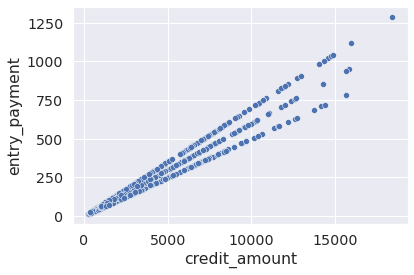

In [154]:
sns.scatterplot(x='credit_amount', y = 'entry_payment', data=df)

Os valores da maioria das colunas são categorizados, exceto `credit_amount, credit_duration` e `age`. Por isso decidi categorizar esses dados, para que todos os dados sejam uniformes e parecidos. 

In [155]:
dados_tratados['credit_amount'].describe()

count     1200.000000
mean      3239.492500
std       2793.025577
min        250.000000
25%       1359.500000
50%       2300.000000
75%       3959.000000
max      18424.000000
Name: credit_amount, dtype: float64

In [156]:
dados_tratados['credit_duration'].describe()

count    1200.000000
mean       20.642500
std        11.694742
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: credit_duration, dtype: float64

In [157]:
dados_tratados['age'].describe()

count    1200.000000
mean       35.295000
std        10.941408
min        19.000000
25%        27.000000
50%        33.000000
75%        41.000000
max        75.000000
Name: age, dtype: float64

Criei uma função `cria_categorias` onde para cada um dos atributos é categorizado de acordo com os quartis apresentados pela função `describe`. Para as colunas `credit_amount` e `credit_duration` fiz mais uma categoria, pois o último quartil (75% - 100%) possui uma amplitude alta em comparação com os demais.

In [158]:
def cria_categorias(df, col, criterios):
  for i, criterio in enumerate(criterios):
    df.loc[df[col] < criterio, col+"_classe"] = i + 1
  df.loc[df[col]>= criterios[0], col+"_classe"] = len(criterios) + 1
  df[col+"_classe"] = df[col+"_classe"].astype(int)
  return df

In [159]:
categorias = {
    "age": [55,40,28],
    "credit_amount": [13000,6000,3000,1500],
    "credit_duration": [38,24,18,12]
    }
for col, criterios in categorias.items():
  dados_tratados = cria_categorias(dados_tratados,col,criterios)

dados_tratados['age_classe'].value_counts()

2    513
3    338
1    266
4     83
Name: age_classe, dtype: int64

In [160]:
dados_tratados.isnull().sum()

account_status             0
credit_duration            0
history_of_compliance      0
credit_purpose             0
credit_amount              0
savings                    0
employment_duration        0
personal_status_sex        0
other_debtors              0
property                   0
age                        0
other_installment_plans    0
type_of_housing            0
foreign_worker             0
credit_risk                0
age_classe                 0
credit_amount_classe       0
credit_duration_classe     0
dtype: int64

In [161]:
#apagando as colunas dos dados não categoricos.
dados_tratados.drop(['age','credit_duration','credit_amount'], axis=1, inplace=True)


In [162]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_status           1200 non-null   int64  
 1   credit_duration          1200 non-null   int64  
 2   history_of_compliance    1200 non-null   int64  
 3   credit_purpose           1200 non-null   int64  
 4   credit_amount            1200 non-null   int64  
 5   savings                  1200 non-null   int64  
 6   employment_duration      1200 non-null   int64  
 7   installment_rate         1200 non-null   int64  
 8   personal_status_sex      1200 non-null   int64  
 9   other_debtors            1200 non-null   int64  
 10  present_residence        1200 non-null   int64  
 11  property                 1200 non-null   int64  
 12  age                      1200 non-null   int64  
 13  other_installment_plans  1200 non-null   int64  
 14  type_of_housing         

# Machine Learning - Logistic Regression/ Regressão Logística

Para implementar um modelo de classificação, é preciso separar a base de dados em base de treino e base de teste. O modelo aprende com a base de treino, e verifica a aprendizagem com a base de teste. A base de teste irá mostrar se as previsões estão de acordo com o esperado e a acurácia do modelo.
Se o modelo é treinado e testado com a mesma base, o modelo entrega uma precisão alta de previsão, mas que não condiz com a realidade. 

Utilizei a função `train_teste_split` da biblioteca Scikit-Learn para fazer a divisão dos dados. 

Defini o conjunto de dados como `x`, que é o dataframe menos a coluna `credit_risk` e `y`, dados que  é a variável que o modelo irá prever, a coluna `credit_risk`. E o `x_treino`, `x_teste`, `y_treino`, `y_teste` do `train_test_split`.

Na função `train_test_split` utilizei alguns parametros importantes, como o `test_size` que irá dividir a base de dados em 80% dos dados para treino e 20% para teste. O parametro `random_state` irá garantir que toda vez que eu rodar o código a saída será igual. Ele classifica todas as combinações de dados possíveis e, ao escolher um número, ele utiliza sempre a mesma combinação. 
Por fim, utilizei o parâmetro `stratify = y`, pois a base de dados tem um balanceamento de 70/30. E esse parametro garante que a base de teste e treino irá levar em consideração essa proporção de classe. Eu vi, também, que para alguns problemas é importante deixar o banco de dados balanceado e ~50/50. Como fiquei em dúvida de qual utilizar, mantive o balancemanto original dos dados. 

In [163]:
from sklearn.model_selection import train_test_split

x = dados_tratados.drop('credit_risk', axis=1)
y = dados_tratados['credit_risk']

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.2, stratify = y, random_state=42)

Eu escolhi como primeiro modelo a regressão logística, por se tratar de um método que é utilizado para problemas de classificação binária (0:bad, 1:good). O algoritmo irá analisar os aspectos e as variáveis que cada cliente e depois retorna a probabilidade dele pertencer a uma das classes.

O modelo de regressão logistica será chamado de `modelo_lr` e declarei ele de acordo com a função `LogisticRegression()`. Eu li que é uma boa prática utilizar o parâmetro `max_iter`, pois assim ele irá convegir para um resultado e não aparece nenhum warning no retorno.

Em seguida, utilizei a função `.fit(x_treino, y_treino)` para ajustar o modelo. Os argumentos passados são` x_treino` e `y_treino`, pois será por meio desses dados que o algoritmo aprenderá. 
A função `.score(x_teste, y_teste)` irá verificar a acurácia do modelo, ou seja, quantas predições o modelo acertou na base de teste. 
Como resultado, obtive o valor da acurácia: ~0,77. O que quer dizer que o modelo está acertando 77% das previsões, por exemplo, caso tenha 100 clientes o modelo irá acertar a classificação de 77 e errar a de 23.

In [164]:
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression(max_iter=1000)
modelo_lr.fit(x_treino, y_treino)
modelo_lr.score(x_teste, y_teste)

0.7708333333333334

Um bom jeito de testar se o modelo possui um bom valor de acurácia é comparar com o resultado de outro modelo. Para isso, utilizei o `DummyClassifier`, um modelo menos complexo do `Scikit-Learn`.

O processo para ajustar este modelo é parecido com o utilizado para a regressão logística: dividir a base em treino e teste, definir um nome para esse modelo `modelo_dummy` e ajustar ele com os dados de treino e, ao final, verificar a acurácia com o conjunto teste.

Para utilizar o `DummyClassifier` definir uma estratégia para fazer o ajuste do modelo. Para este caso, defini que a estratégia será os dados mais frequentes de valor no target. Assim, temos:` DummyClassifier('most_frequent')`, isso quer dizer que: dado o valor mais frequente da nossa variável resposta (1:good), o modelo Dummy vai chutar que todos os eventos da base de dados assumem aquele valor no target. Para calcular a acurácia utilizarei a função `accuracy_score` do `Scikit-Learn`. Ela receberá como parâmetros a base teste da variável resposta `y_teste` e as previsões do modelo `previsao_dummy` que recebe `x_teste` como parâmetro. 

In [165]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

0.7

A acurácia do `DummyClassifier` foi de 70%, isso significa que o modelo `LogisticRegression` teve um desempenho um pouco melhor.

In [166]:
dados_tratados['credit_risk'].value_counts(normalize=True)

1    0.7
0    0.3
Name: credit_risk, dtype: float64

A acurácia do `DummyClassifier` esta relacionada ao valor mais frequente, a proporção dos dados são 70/30. 

Outra forma de quantificar o desempenho do modelo é a matriz de confusão. Os modelos de previsões tem suas margens de erro, por isso terá dados previstos como A, mas que deveriam ser B. Por isso é importante apresentar os resultados de falsos positivos , falsos negativos , verdadeiros positivos e verdadeiros negativos para entender melhor o modelo. 

In [167]:
from sklearn.metrics import confusion_matrix

pred_lr = modelo_lr.predict(x_teste)

mc_lr = confusion_matrix(y_teste, pred_lr)
mc_lr

array([[ 31,  41],
       [ 14, 154]])

A matriz confusão diz que o modelo previu:


*   31 true negative (negativo verdadeiro), ou seja, 31 pessoas foram marcadas com um risco ruim de crédito e essa marcação estava correta.
*   154 true positive (verdadeiro positivo), 154 pessoas marcadas com risco bom de crédito e que cumpriram com o acordo.
*   41 false positive (falso positivo), 41 pessoas previstas incorretamente com um risco bom de crédito
*   14 false negative (falso negativo), 14 pessoas previstas como risco ruim, mas que na verdade é uma pessoa de risco bom.







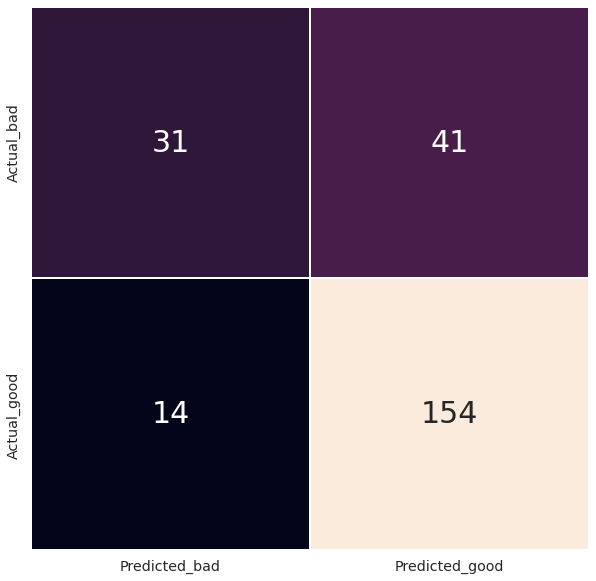

In [168]:
plt.figure(figsize = (10,10))
plt.rcParams['font.size']=30
sns.heatmap(mc_lr, annot=True, linewidths=1, fmt='.0f', cbar=False,
            xticklabels=['Predicted_bad', 'Predicted_good'], 
            yticklabels=['Actual_bad', 'Actual_good'])

# Machine Learning - Decision Tree/ Arvore de decisão


Outro modelo que conheço e resolvi testar é a Arvore de decisão.  

Repeti o mesmo passo de distribuir os dados em duas variáveis, `a` e `b`, e fiz o `train_test_split` para separar o `a_teste`, `b_teste`, `a_treino` e `b_treino`. 


Utilizei a função `DecisionTreeClassifier` da biblioteca Scikit-Learn. O único parâmetro que declarei foi o `max_depth = 3`, que fará com que a arvore de decisão possua 3 níveis de decisoes. O modelo é ajustado pelo treinamento com o `.fit()`.

In [169]:
from sklearn.tree import DecisionTreeClassifier

a = dados_tratados.drop('credit_risk', axis=1)
b = dados_tratados['credit_risk']


a_treino, a_teste, b_treino, b_teste = train_test_split(a, b,
                                                        test_size = 0.2, 
                                                        stratify=b, 
                                                        random_state=42)

modelo_arvore = DecisionTreeClassifier(max_depth=3)
modelo_arvore.fit(a_treino, b_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Para uma melhor visualização do modelo utilizei a biblioteca `graphviz`. Vi que dá para plotar a árvore de decisão no próprio Jupyter Notebook, mas exportando em pdf o layout ficou melhor.

In [170]:
from sklearn import tree
from graphviz import Source
from sklearn.tree import export_graphviz

# Exportando a arvore de decisão em pdf
dot_data = tree.export_graphviz(modelo_arvore,
                                feature_names = list(a_treino),
                                class_names = ['Bad', 'Good'],
                                out_file = None ) 
graph = Source(dot_data) 
graph.render("DecisionTree") 

'DecisionTree.pdf'

Para avaliar o modelo de arvore utilizei o `cross_val_score` do subpacote `sklearn.model_selection`. Essa função irá executar a validaçao cruzada de acordo com um número de partições (folders) que será definido no parâmetro `cv`. O `print` irá retornar a performance para cada partição do teste. 
O `pred_tree` irá aplicar o modelo treinado no teste e verificar qual o desempenho nos dados `a_teste`. Depois calculei a acurácia com função `accuracy_score`, que irá comparar o resultado obtido com o `b_teste` e ver em quais previu corretamente e em quais o modelo errou. 
A acurácia desse modelo, definida em `pred_tree`, é de ~0,72 ou 72% de precisão. Menor que a acurácia obtida com a regressão logística , que foi de ~0,77

In [171]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


print(cross_val_score(modelo_arvore, a_teste, b_teste, cv = 10))
pred_dt = modelo_arvore.predict(a_teste)
print('Acuracia de: ', accuracy_score(pred_dt, b_teste)*100)

[0.58333333 0.54166667 0.66666667 0.75       0.79166667 0.5
 0.79166667 0.70833333 0.66666667 0.70833333]
Acuracia de:  71.66666666666667


A matriz confusão do modelo de árvore de decisão diz que o modelo previu:


*   7 true negative (negativo verdadeiro)
*   165 true positive (verdadeiro positivo)
*   65 false positive (falso positivo)
*   3 false negative (falso negativo)


In [172]:
mc_dt = confusion_matrix(b_teste, pred_dt)
mc_dt

array([[  7,  65],
       [  3, 165]])

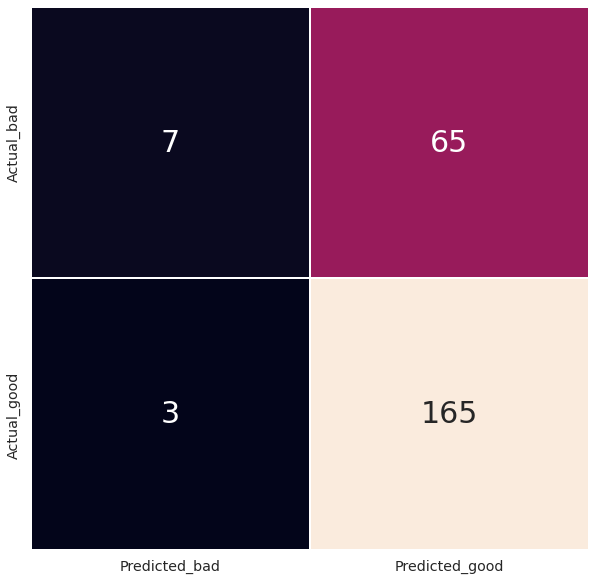

In [173]:
plt.figure(figsize = (10,10))
plt.rcParams['font.size']=30
sns.heatmap(mc_dt, annot=True,linewidths=1, fmt='.0f',cbar=False,
            xticklabels=['Predicted_bad', 'Predicted_good'], yticklabels=['Actual_bad', 'Actual_good'])

A árvore de decisão 'escolhe', por assim dizer, pesos para os atributos dos dados. Esses pesos são possíveis de verificar utilizando a função `feature_importances_`. Quantos maior for o `max_depth` definido, ou seja mais níveis a árvore conter, melhor os pesos serão destribuidos entre os atributos. Porém, quanto mais níveis a árvore contêm, mais lento e menos otimizado é o modelo. 

In [174]:
modelo_arvore.feature_importances_

array([0.60769429, 0.        , 0.02897005, 0.1564727 , 0.02159303,
       0.        , 0.        , 0.        , 0.04732278, 0.        ,
       0.        , 0.        , 0.        , 0.13794715])

Pesos dados para os atributos

*   account_status = 0.60769429
*   credit_purpose = 0.02897005
*   savings = 0.1564727 
*   employment_duration = 0.02159303
*   other_installment_plans = 0.04732278
*   credit_duration_classe = 0.13794715
       


# Machine learning - Random forest/Floresta Aleatória 

O modelo Random Forest ou foresta aleatória funciona como se eu aplicasse o modelo de árvore de decisão várias vezes de forma simultânea. A previsão selecionada será aquela que for compatível com o maior número de árvores rodados. Dessa forma, o modelo Random Forest melhora a acurácia do modelo de árvore de decisão. 
A parte randomica do modelo garante que, ao invés de procurar pelos melhores atributos para fazer a partição dos nós, ele busca o melhor atributo em um subconjunto aleatório de atributos. Gerando uma maior diversidade de dados, o que também ajuda a melhorar a acurácia do modelo. 

A acurácia obtida nesse modelo foi entre ~0.76 a ~0.80, maior que os ~0.72 da arvore de decisão e próximo aos ~0.77 do modelo de regressão logística. A acurácia desse modelo é variável, pois leva em conta o `cv`, que funciona de forma similar ao `cross_val_score`, e cada vez que executo essa função ela compara um conjunto de dados diferente.

In [175]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier()
modelo_rf.fit(a_treino, b_treino)

print(cross_val_score(modelo_rf, a_teste, b_teste, cv=10))

pred_rf = modelo_rf.predict(a_teste)
print('Acuracia de: ', accuracy_score(pred_rf, b_teste)*100)

[0.70833333 0.70833333 0.83333333 0.79166667 0.95833333 0.66666667
 0.79166667 0.66666667 0.79166667 0.75      ]
Acuracia de:  78.75


A matriz confusão mostra que o modelo previu: 
*   41 true negative (negativo verdadeiro)
*   149 true positive (verdadeiro positivo)
*   31 false positive (falso positivo)
*   19 false negative (falso negativo)

In [176]:
mc_rf = confusion_matrix(b_teste, pred)
mc_rf

array([[ 41,  31],
       [ 19, 149]])

# Conclusão

É possível observar, no gráfico abaixo, o comparativo de desempenho entre os três modelos por meio dos valores obtidos na matriz confusão.

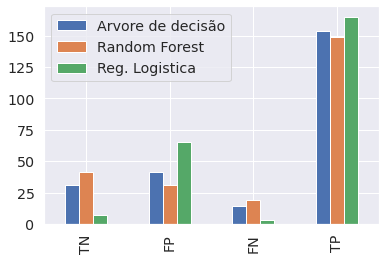

In [178]:
r = []
for mc in [mc_lr, mc_rf, mc_dt]:
  r.append([mc[0][0], mc[0][1], mc[1][0], mc[1][1]])
r = pd.DataFrame(r, 
                 columns=['TN', 'FP', 'FN','TP'], 
                 index=['Arvore de decisão', 'Random Forest','Reg. Logistica'])

r.T.plot.bar()

Com base nisso, eu escolheria o modelo de floresta aleatória para essa base de dados, pois foi o modelo que previu menos falso positivos, ou seja, o número menor de pessoas que foram previstas como um risco bom, mas na verdade tinham um risco ruim. Esse modelo previu 31, o modelo de regressão logística previu 41 e do árvore de decisão foi 65. E esse é um fator importante para o fornecimento de crédito/dinheiro, onde o banco pode ter prejuizo se o modelo prever muitos falsos positivos. 